In [1]:
#import the Pandas, Matplotlib, and NumPy dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=493a1fc0dedcc194616e1522c4f024d9


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=2000)
lngs = np.random.uniform(low=-180, high=180, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#import citipy
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

766

In [7]:
## Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
## Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | saint-raymond
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | honiara
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | suntar
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | udachnyy
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | ekhabi
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | maniitsoq
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of Set

Processing Record 43 of Set 4 | paranaiba
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | mbaiki
Processing Record 48 of Set 4 | shache
Processing Record 49 of Set 4 | litovel
Processing Record 50 of Set 4 | dalby
Processing Record 1 of Set 5 | colares
Processing Record 2 of Set 5 | acapulco
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | hit
Processing Record 6 of Set 5 | krasnyy klyuch
Processing Record 7 of Set 5 | hilo
Processing Record 8 of Set 5 | parrita
Processing Record 9 of Set 5 | sursk
Processing Record 10 of Set 5 | liverpool
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | semikarakorsk
Processing Record 13 of Set 5 | beloha
Processing Record 14 of Set 5 | nikolskoye
Processing Record 15 of Set 5 | half moon bay
Processing Record 16 of Set 5 | alice spring

Processing Record 38 of Set 8 | san policarpo
Processing Record 39 of Set 8 | nouakchott
Processing Record 40 of Set 8 | bonavista
Processing Record 41 of Set 8 | belaya gora
Processing Record 42 of Set 8 | jasper
Processing Record 43 of Set 8 | mayumba
Processing Record 44 of Set 8 | binga
Processing Record 45 of Set 8 | aleksandriya
Processing Record 46 of Set 8 | mehamn
Processing Record 47 of Set 8 | juifang
City not found. Skipping...
Processing Record 48 of Set 8 | ust-ilimsk
Processing Record 49 of Set 8 | clyde river
Processing Record 50 of Set 8 | porbandar
Processing Record 1 of Set 9 | bonthe
Processing Record 2 of Set 9 | mogadishu
Processing Record 3 of Set 9 | halifax
Processing Record 4 of Set 9 | cayenne
Processing Record 5 of Set 9 | alyangula
Processing Record 6 of Set 9 | kroderen
City not found. Skipping...
Processing Record 7 of Set 9 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 9 | ambilobe
Processing Record 9 of Set 9 | bendigo
Processin

Processing Record 24 of Set 12 | avallon
Processing Record 25 of Set 12 | kenora
Processing Record 26 of Set 12 | san luis
Processing Record 27 of Set 12 | vigrestad
Processing Record 28 of Set 12 | katsuura
Processing Record 29 of Set 12 | bani walid
Processing Record 30 of Set 12 | achisay
City not found. Skipping...
Processing Record 31 of Set 12 | japura
Processing Record 32 of Set 12 | honningsvag
Processing Record 33 of Set 12 | mayo
Processing Record 34 of Set 12 | zyryanka
Processing Record 35 of Set 12 | ranong
Processing Record 36 of Set 12 | llata
Processing Record 37 of Set 12 | san carlos de bariloche
Processing Record 38 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 12 | harindanga
Processing Record 40 of Set 12 | canutama
Processing Record 41 of Set 12 | agua branca
Processing Record 42 of Set 12 | saleaula
City not found. Skipping...
Processing Record 43 of Set 12 | bontang
Processing Record 44 of Set 12 | caravelas
Processing Record 45 of 

Processing Record 15 of Set 16 | sao joao da barra
Processing Record 16 of Set 16 | baykit
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
### Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,45.81,93,100,3.80,NZ,2021-01-17 13:03:06
1,Saint-Raymond,45.4670,-73.6095,32.00,100,90,12.66,CA,2021-01-17 13:03:04
2,Talnakh,69.4865,88.3972,-20.07,69,100,6.82,RU,2021-01-17 13:03:06
3,Busselton,-33.6500,115.3333,79.00,33,100,11.63,AU,2021-01-17 13:03:06
4,Ushuaia,-54.8000,-68.3000,50.00,71,75,3.44,AR,2021-01-17 13:01:38
5,Albany,42.6001,-73.9662,35.01,66,86,1.99,US,2021-01-17 13:00:06
6,Rikitea,-23.1203,-134.9692,77.79,78,0,14.03,PF,2021-01-17 13:03:06
7,Kapaa,22.0752,-159.3190,73.40,88,90,4.61,US,2021-01-17 13:03:06
8,Honiara,-9.4333,159.9500,78.55,81,98,6.49,SB,2021-01-17 13:03:07
9,San Patricio,28.0170,-97.5169,51.80,82,75,10.36,US,2021-01-17 13:03:07


In [11]:
#Reorder the columns as city, country, date, and etc
Column_Reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[Column_Reorder]

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#reordered columns
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-17 13:03:06,-46.1927,168.8643,45.81,93,100,3.80
1,Saint-Raymond,CA,2021-01-17 13:03:04,45.4670,-73.6095,32.00,100,90,12.66
2,Talnakh,RU,2021-01-17 13:03:06,69.4865,88.3972,-20.07,69,100,6.82
3,Busselton,AU,2021-01-17 13:03:06,-33.6500,115.3333,79.00,33,100,11.63
4,Ushuaia,AR,2021-01-17 13:01:38,-54.8000,-68.3000,50.00,71,75,3.44


In [13]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
#create N/sourthern DataFrame
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-01-17 13:03:07
Lat                      -34.4187
Lng                       19.2345
Max Temp                       81
Humidity                       54
Cloudiness                      4
Wind Speed                   8.01
Name: 13, dtype: object

In [15]:
#Lat greater or equal to 0
city_data_df["Lat"] >=0


0      False
1       True
2       True
3      False
4      False
       ...  
708     True
709     True
710     True
711    False
712     True
Name: Lat, Length: 713, dtype: bool

In [16]:
#return data where Lat greater or equst to 0 using LOC
city_data_df.loc[city_data_df["Lat"] >= 0]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Raymond,CA,2021-01-17 13:03:04,45.4670,-73.6095,32.00,100,90,12.66
2,Talnakh,RU,2021-01-17 13:03:06,69.4865,88.3972,-20.07,69,100,6.82
5,Albany,US,2021-01-17 13:00:06,42.6001,-73.9662,35.01,66,86,1.99
7,Kapaa,US,2021-01-17 13:03:06,22.0752,-159.3190,73.40,88,90,4.61
9,San Patricio,US,2021-01-17 13:03:07,28.0170,-97.5169,51.80,82,75,10.36
...,...,...,...,...,...,...,...,...,...
707,Moses Lake,US,2021-01-17 13:01:30,47.1301,-119.2781,37.40,87,90,5.75
708,Chifeng,CN,2021-01-17 13:03:34,42.2683,118.9636,0.48,83,50,5.70
709,Kirksville,US,2021-01-17 13:04:03,40.1948,-92.5833,27.00,86,75,10.36
710,Sitangkai,PH,2021-01-17 13:04:03,4.6628,119.3928,78.87,77,100,13.78


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


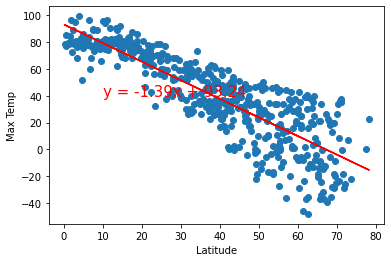

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

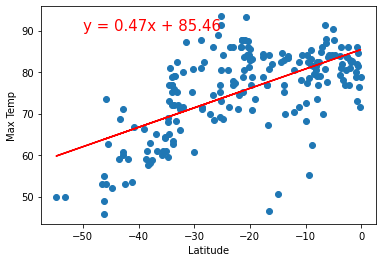

In [19]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50, 90))

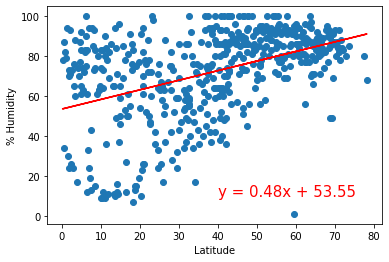

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-21-9c3e8b244753>, line 6)

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(10,55))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
#Begins 6.5.1 Set Up Google Maps and Places API